## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the data

In [2]:
df = pd.read_csv('milestone1_dataset.csv')

In [3]:
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
6494,4310-KEDTB,0,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.50,No
6495,7254-IQWOZ,1,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
6496,2474-BRUCM,1,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,Yes
6497,4062-HBMOS,1,0,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.80,No
6498,0742-NXBGR,0,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30,Yes


In [5]:
df.shape

(6499, 21)

- Data is 21 variables with 6499 entries

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior_Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone_Service      6499 non-null   object 
 7   Multiple_Lines     6499 non-null   object 
 8   Internet_Service   6499 non-null   object 
 9   Online_Security    6499 non-null   object 
 10  Online_Backup      6499 non-null   object 
 11  Device_Protection  6499 non-null   object 
 12  Tech_Support       6499 non-null   object 
 13  Streaming_TV       6499 non-null   object 
 14  Streaming_Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless_Billing  6499 

- There are 9 missing values under total charges, replace missing values with median value

In [7]:
df["Total_Charges"].fillna(float(df['Total_Charges'].median()), inplace = True)

- Changing Object columns to Category

In [8]:
for col in ['CustomerID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn']:
    df[col] = df[col].astype('category')

In [9]:
df.describe()

,Tenure,Monthly_Charges,Total_Charges
count,6499.000000,6499.000000,6499.000000
mean,32.369134,64.733344,2281.708447
std,24.584693,30.136193,2268.701542
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,399.800000
50%,29.000000,70.350000,1397.100000
75%,55.000000,89.850000,3778.100000
max,72.000000,118.750000,8684.800000


- On average a customer stays with the company about 3.6 years

- The average customer see a bill of $64.73

- Total charges  to a customer runs on average about $2,281.71

In [10]:
df.loc[df.Tenure == 0]

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.1,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.1,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.1,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.1,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.1,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.1,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.1,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.1,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.1,No


In [11]:
# No duplicate records found
df.duplicated(subset='CustomerID').sum()

0

In [12]:
for col in df.select_dtypes('category'):
   print(col,':', df[col].nunique())

CustomerID : 6499
Gender : 2
Senior_Citizen : 2
Partner : 2
Dependents : 2
Phone_Service : 2
Multiple_Lines : 3
Internet_Service : 4
Online_Security : 3
Online_Backup : 3
Device_Protection : 3
Tech_Support : 3
Streaming_TV : 3
Streaming_Movies : 3
Contract : 3
Paperless_Billing : 2
Payment_Method : 4
Churn : 2


- Internet service should only have 3 unique values

In [13]:
df['Internet_Service'].value_counts()

Fiber optic    2856
DSL            2217
No             1422
Fiber-optic       4
Name: Internet_Service, dtype: int64

- Due to a formatting issue we have 4 values that are not counted correctly

In [14]:
df['Internet_Service'] = df['Internet_Service'].replace({'Fiber-optic': 'Fiber optic'})
df['Internet_Service'].value_counts()

Fiber optic    2860
DSL            2217
No             1422
Name: Internet_Service, dtype: int64

In [15]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

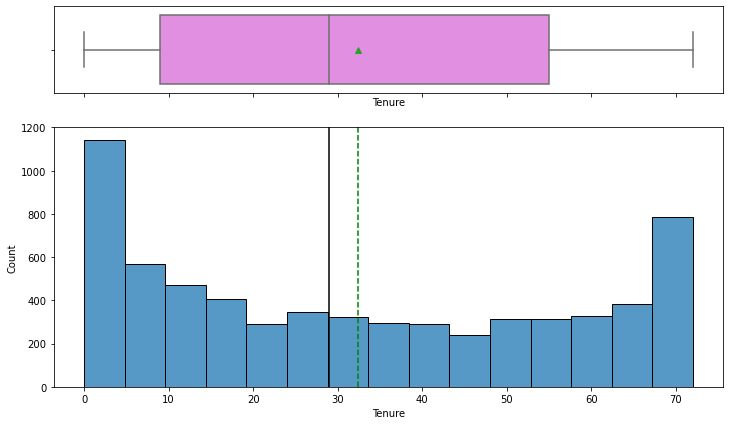

In [19]:
histogram_boxplot(df, 'Tenure', figsize=(12, 7), kde=False, bins=None)

- Looks like most people will churn within the first 5 months then its even until you get to around 6 years where we see another spike

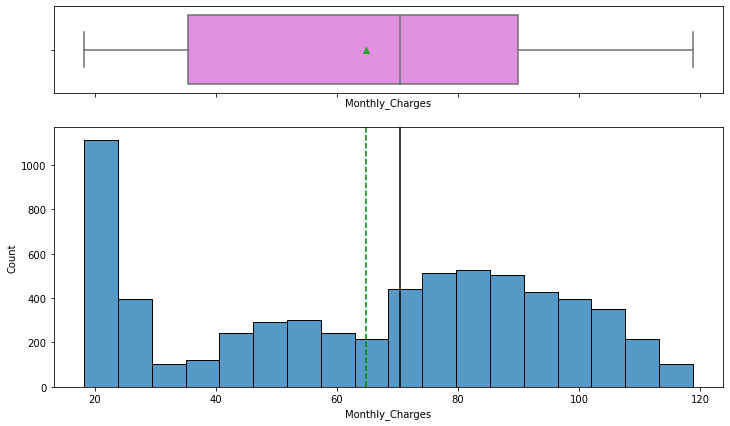

In [20]:
histogram_boxplot(df, 'Monthly_Charges', figsize=(12, 7), kde=False, bins=None)

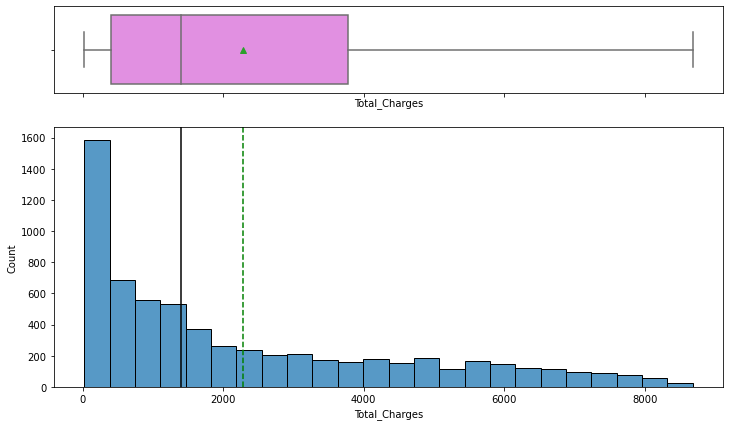

In [21]:
histogram_boxplot(df, 'Total_Charges', figsize=(12, 7), kde=False, bins=None)

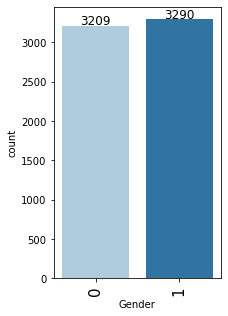

In [22]:
labeled_barplot(df, 'Gender', perc=False, n=None)
plt.show()

- Gender is reflected relatively evenly within the dataframe

In [23]:
df.groupby('Gender')['Churn'].value_counts()

Gender     
0       No     2347
        Yes     862
1       No     2437
        Yes     853
Name: Churn, dtype: int64

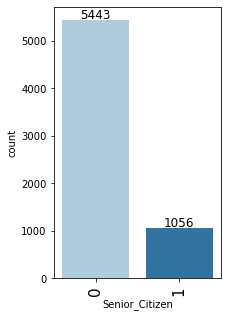

In [24]:
labeled_barplot(df, 'Senior_Citizen', perc=False, n=None)
plt.show()

In [25]:
df.groupby('Senior_Citizen')['Churn'].value_counts()

Senior_Citizen     
0               No     4163
                Yes    1280
1               No      621
                Yes     435
Name: Churn, dtype: int64

- Senior churn is 41.93%

- Non-senior churn is 25.33%
- Looks like seniors are churn at a higher rate than non-seniors, but less seniors sign up as well

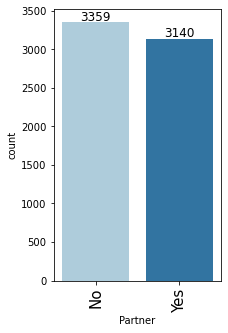

In [26]:
labeled_barplot(df, 'Partner', perc=False, n=None)
plt.show()

- Partner is reflected fairly evenly 

In [27]:
df.groupby('Partner')['Churn'].value_counts()

Partner     
No       No     2260
         Yes    1099
Yes      No     2524
         Yes     616
Name: Churn, dtype: int64

- Customers with partners churn at 19.62%
- Customers with no partners churn at 32.72%

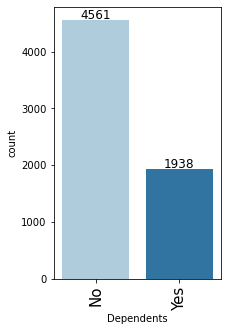

In [28]:
labeled_barplot(df, 'Dependents', perc=False, n=None)
plt.show()

In [29]:
df.groupby('Dependents')['Churn'].value_counts()

Dependents     
No          No     3144
            Yes    1417
Yes         No     1640
            Yes     298
Name: Churn, dtype: int64

- Customers with dependents have 15.38% churn 
- Customers with no dependents have a 31.07% churn

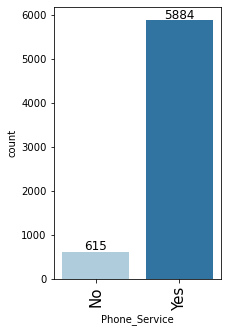

In [30]:
labeled_barplot(df, 'Phone_Service', perc=False, n=None)
plt.show()

In [31]:

df.groupby('Phone_Service')['Churn'].value_counts()

Phone_Service     
No             No      461
               Yes     154
Yes            No     4323
               Yes    1561
Name: Churn, dtype: int64

- Customers with phone service 26.35% churn rate
- Customers with no phone service 25.04% churn
- Does not seem like Phone service is responsible for any type of Churn

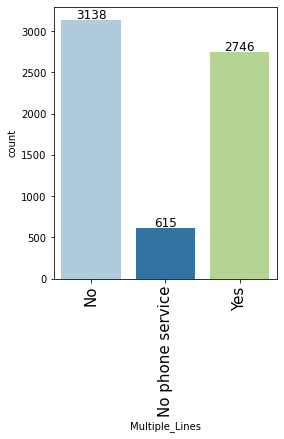

In [32]:
labeled_barplot(df, 'Multiple_Lines', perc=False, n=None)
plt.show()

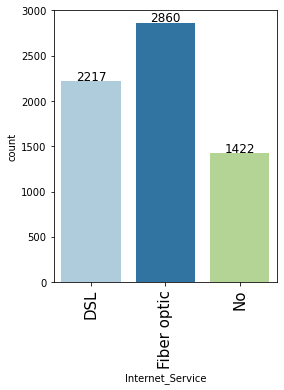

In [33]:
labeled_barplot(df, 'Internet_Service', perc=False, n=None)
plt.show()

In [34]:
# DSL 18.72%
# fiber optic 41.68%
# no 7.6%

df.groupby('Internet_Service')['Churn'].value_counts()

Internet_Service     
DSL               No     1802
                  Yes     415
Fiber optic       No     1668
                  Yes    1192
No                No     1314
                  Yes     108
Name: Churn, dtype: int64

- DSL 18.72%
- fiber optic 41.68%
- no 7.6%
- Fiber optic internet service seems to have a high churn rate

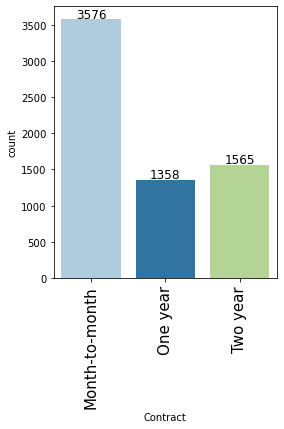

In [35]:
labeled_barplot(df, 'Contract', perc=False, n=None)
plt.show()

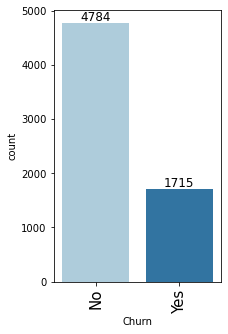

In [36]:
labeled_barplot(df, 'Churn', perc=False, n=None)
plt.show()

Churn     No   Yes   All
Gender                  
All     4784  1715  6499
0       2347   862  3209
1       2437   853  3290
------------------------------------------------------------------------------------------------------------------------


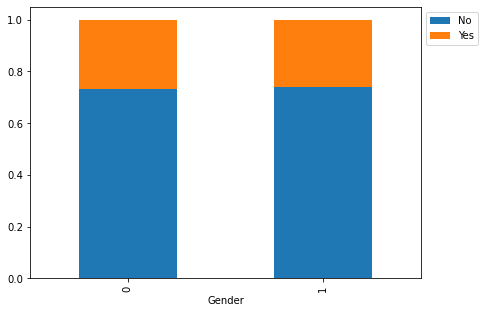

No handles with labels found to put in legend.


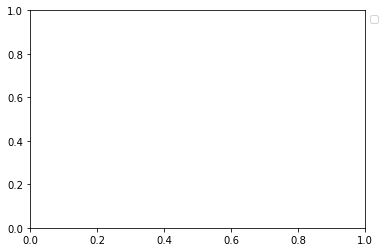

In [37]:
stacked_barplot(df, 'Gender', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Churn            No   Yes   All
Phone_Service                  
All            4784  1715  6499
Yes            4323  1561  5884
No              461   154   615
------------------------------------------------------------------------------------------------------------------------


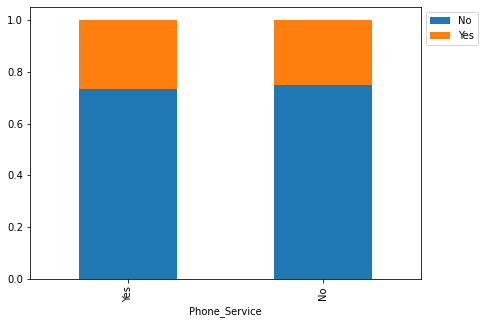

No handles with labels found to put in legend.


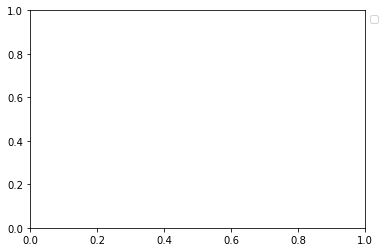

In [38]:
stacked_barplot(df, 'Phone_Service', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Churn               No   Yes   All
Internet_Service                  
All               4784  1715  6499
Fiber optic       1668  1192  2860
DSL               1802   415  2217
No                1314   108  1422
------------------------------------------------------------------------------------------------------------------------


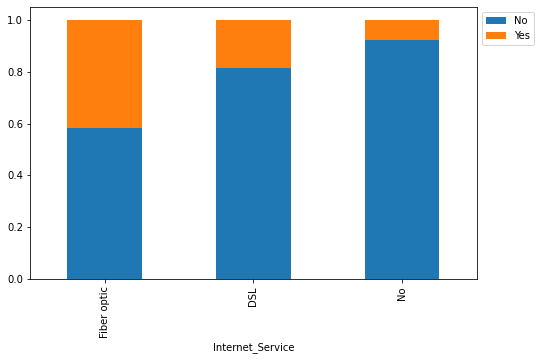

No handles with labels found to put in legend.


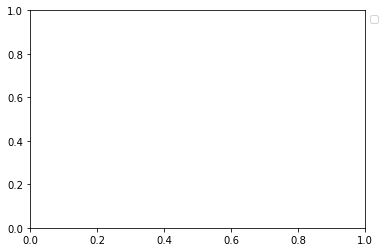

In [39]:
stacked_barplot(df, 'Internet_Service', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

- Again we see Fiber optic with a larger churn rate than any other form of internet service

Churn             No   Yes   All
Contract                        
All             4784  1715  6499
Month-to-month  2056  1520  3576
One year        1206   152  1358
Two year        1522    43  1565
------------------------------------------------------------------------------------------------------------------------


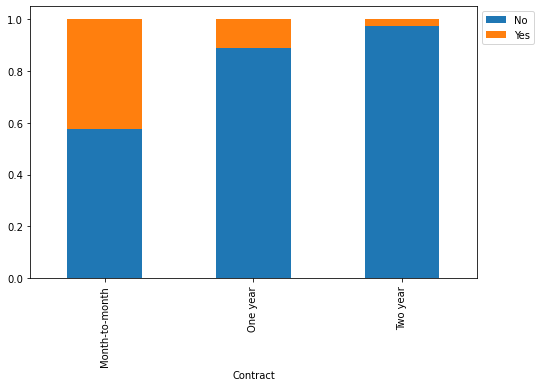

No handles with labels found to put in legend.


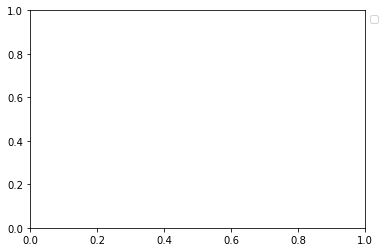

In [40]:
stacked_barplot(df, 'Contract', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Churn                  No   Yes   All
Streaming_Movies                     
All                  4784  1715  6499
No                   1702   853  2555
Yes                  1768   754  2522
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


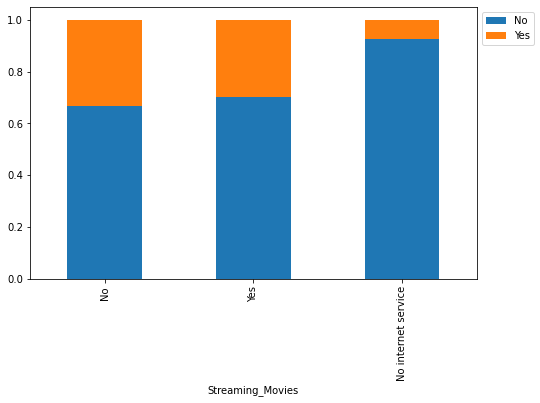

No handles with labels found to put in legend.


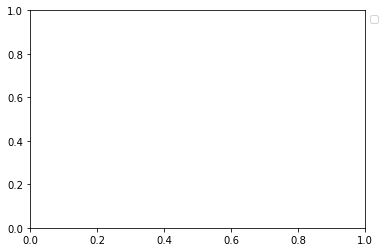

In [41]:
stacked_barplot(df, 'Streaming_Movies', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Churn                  No   Yes   All
Streaming_TV                         
All                  4784  1715  6499
No                   1734   855  2589
Yes                  1736   752  2488
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


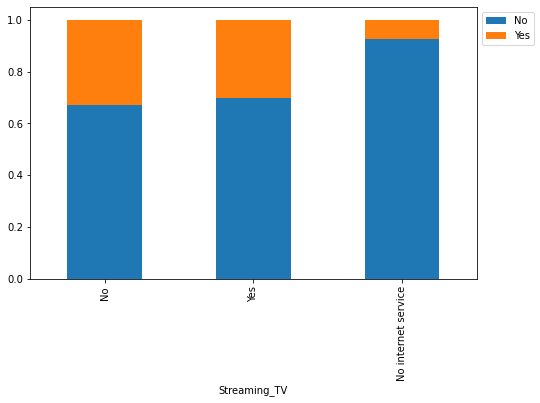

No handles with labels found to put in legend.


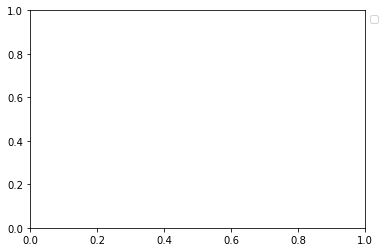

In [42]:
stacked_barplot(df, 'Streaming_TV', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Churn               No   Yes   All
Multiple_Lines                    
All               4784  1715  6499
No                2352   786  3138
Yes               1971   775  2746
No phone service   461   154   615
------------------------------------------------------------------------------------------------------------------------


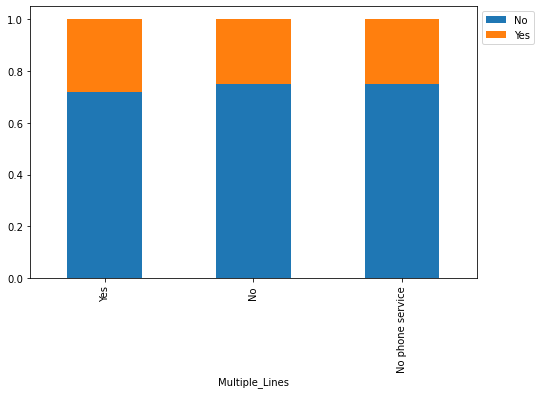

No handles with labels found to put in legend.


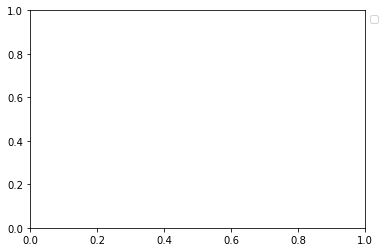

In [43]:
stacked_barplot(df, 'Multiple_Lines', 'Churn')

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

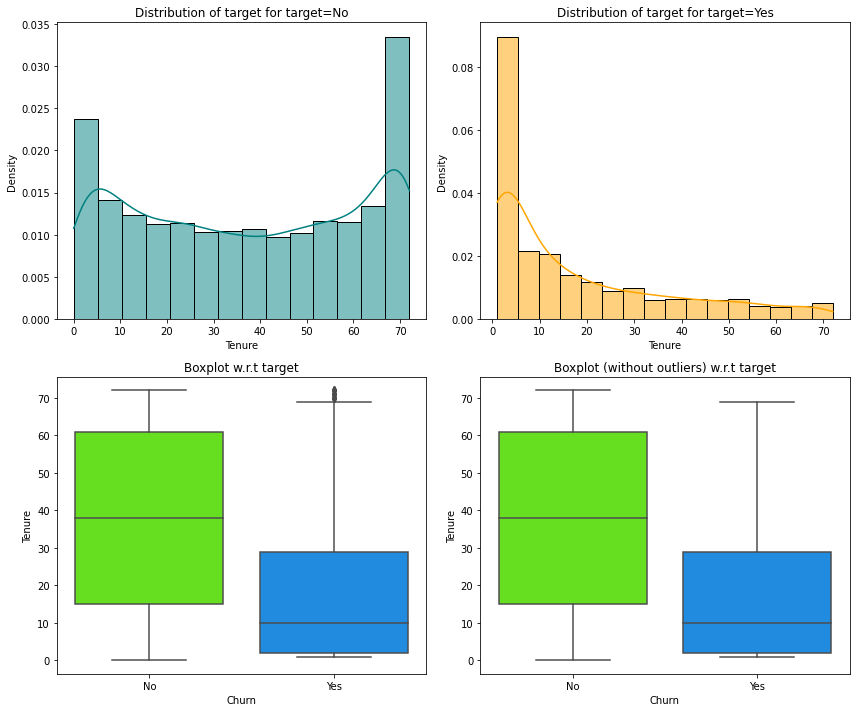

<Figure size 432x288 with 0 Axes>

In [44]:
distribution_plot_wrt_target(df, 'Tenure', 'Churn')

plt.tight_layout()
plt.show()

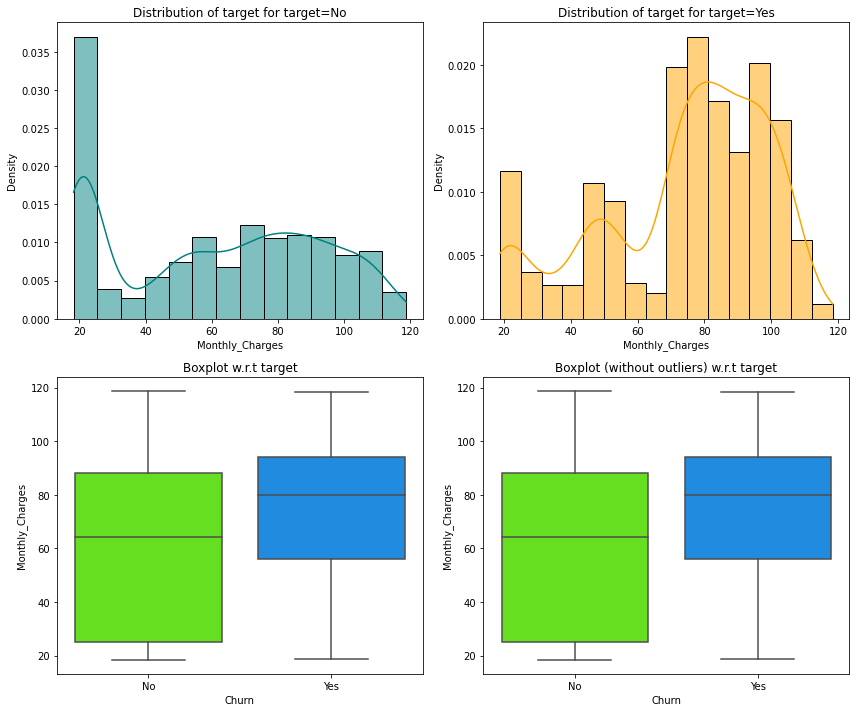

<Figure size 432x288 with 0 Axes>

In [45]:
distribution_plot_wrt_target(df, 'Monthly_Charges', 'Churn')

plt.tight_layout()
plt.show()

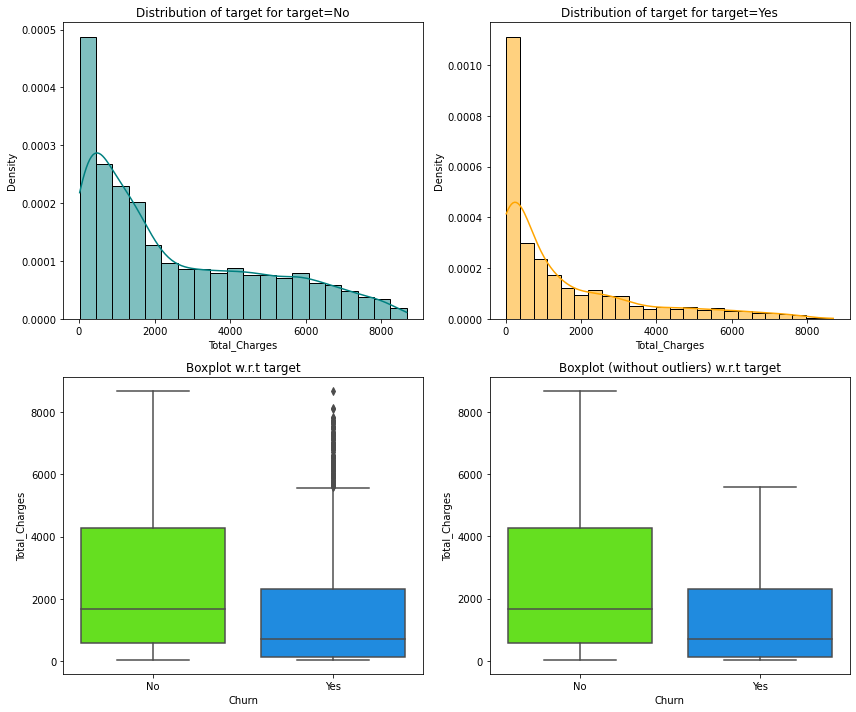

<Figure size 432x288 with 0 Axes>

In [46]:
distribution_plot_wrt_target(df, 'Total_Charges', 'Churn')

plt.tight_layout()
plt.show()

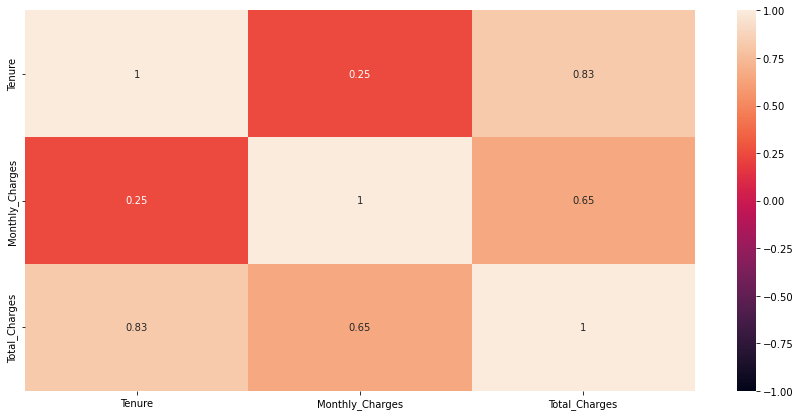

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [48]:
#[Q1] - Display a table to show the relationship between contracts and payment method and write down the observations.

pd.crosstab(df.Contract, df.Payment_Method)

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,542,498,1707,829
One year,357,370,321,310
Two year,527,538,154,346


- Most common is the electronic check for month to month, electronic check being to second to least convenient form of payment
- We see one and two year contracts with more automatic payment options and less instances of the options like electronic or mailed checks

In [49]:
#[Q2] - Display a table to show the relationship between payment and internet service and write down the observations.

pd.crosstab(df.Internet_Service, df.Payment_Method)

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Internet_Service,,,,
DSL,520,549,584,564
Fiber optic,594,553,1482,231
No,312,304,116,690


- We see Fiber optic customers use Electronic check the most 
- We see that they use the less convenient payment option vs an automatic payment

In [50]:
#[Q3] - Display a table to show the relationship between contracts and internet service and write down the observations.

pd.crosstab(df.Internet_Service, df.Contract)

Contract,Month-to-month,One year,Two year
Internet_Service,,,
DSL,1121,518,578
Fiber optic,1964,494,402
No,491,346,585


- We see that fiber optic also has the higher instances of month to month and lower one or two year contracts
- Customers on month to month plans tend to leave quicker 

In [51]:
#[Q4] - Are there any outliers in the numerical columns.

print(round(df.describe(),2))
print('-' * 56)
for col in ['Tenure','Monthly_Charges','Total_Charges']:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = (q3 - q1)*1.5
    uf = q3 + iqr
    lf = q1 - iqr
    print(len(df.loc[df[col] > uf]),'outliers above', col)
    print(len(df.loc[df[col] < lf]),'outliers below', col)

        Tenure  Monthly_Charges  Total_Charges
count  6499.00          6499.00        6499.00
mean     32.37            64.73        2281.71
std      24.58            30.14        2268.70
min       0.00            18.25          18.80
25%       9.00            35.40         399.80
50%      29.00            70.35        1397.10
75%      55.00            89.85        3778.10
max      72.00           118.75        8684.80
--------------------------------------------------------
0 outliers above Tenure
0 outliers below Tenure
0 outliers above Monthly_Charges
0 outliers below Monthly_Charges
0 outliers above Total_Charges
0 outliers below Total_Charges


- None of the numerical columns are showing outliers

In [52]:
#[Q5] -  What is the percentage of customers who cancelled their subscription?

churn_yes = round(len(df.loc[df.Churn == 'Yes']) / len(df) *100, 2) 
print('Percent of customers who cancelled: ', churn_yes,'%')

Percent of customers who cancelled:  26.39 %


In [53]:
#[Q6] - What is the average monthly charge for different types of internet services?

online_services = ['Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']

for col in online_services:
    os = df.loc[df[col] == 'Yes']
    print(col, 'average monthly charge: ', round(os['Monthly_Charges'].mean(),2))

Online_Security average monthly charge:  79.27
Online_Backup average monthly charge:  83.24
Device_Protection average monthly charge:  84.93
Tech_Support average monthly charge:  81.02
Streaming_TV average monthly charge:  88.78
Streaming_Movies average monthly charge:  88.55


In [54]:
#[Q7] - What is the total revenue for different Internet Services?

for col in online_services:
    os = df.loc[df[col] == 'Yes']
    print(col, 'total revenue: ', round(os['Total_Charges'].sum(),2))

Online_Security total revenue:  7066678.05
Online_Backup total revenue:  8625253.85
Device_Protection total revenue:  8776917.0
Tech_Support total revenue:  7188803.25
Streaming_TV total revenue:  9357027.4
Streaming_Movies total revenue:  9501628.4


In [55]:
#[Q8] - What is the average tenure for different contracts?

print("How long a customer stays in years:\n", round(df.groupby('Contract')['Tenure'].mean()/12,2))

How long a customer stays in years:
 Contract
Month-to-month    1.50
One year          3.49
Two year          4.76
Name: Tenure, dtype: float64


In [58]:
#[Q9] - What percentage of customers have online protection?

print('Percent of customers with online protection: ', round(len(df.loc[df['Online_Security'] == 'Yes'])/len(df) * 100, 2),'%')

Percent of customers with online protection:  28.76 %


In [59]:
#[Q10] - Write a code to replace 1 with "Yes" and 0 with "No" in the Churn column.

df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [60]:
### Export the dataset to be used for next milestone
df.to_csv('A2Z_milestone_2_3_input.csv', index=False)